# Data Aquisition & Cleaning - EDA

#### Data pulled:
- Kaggle: https://www.kaggle.com/datasets/josephinelsy/spotify-top-hit-playlist-2010-2022
    * Contains data from 2000 - 2023
- Kaggle: https://www.kaggle.com/datasets/estienneggx/spotify-unpopular-songs?resource=download
- Audio Features: https://developer.spotify.com/documentation/web-api/reference/get-audio-features


##### Import Dependencies and external libraries that will allow the code to function correctly
* pandas = library used for manipulation and analysis of structured data
* numpy = library used for numerical computing and array operations
* re = regular expressions library that allows for a manipulation of strings within dataframe 
* plotly.express = library for creating interactive visualizations
* matplotlib.pyplot = library that generates static visualizations like plots and charts
* sklearn.cluster.KMeans = library that performs K-Means clustering, used for unsupervised machine learning
* sklearn.preprocessing.StandardScaler = library that standardizes features by scaling them to have a mean of 0 and a standard deviation of 1
* sklearn.decomposition.PCA = library that reduces dimensionality in datasets while preserving as much variance as possible (Principal Component Analysis)

In [518]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import re
import ast

import plotly.express as px 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

### Assessing a dataset with audio characteristics of over 4,000 unpopular songs

#### Unpopular Data ETL: Michelle 

In [522]:
# Load dataset - Unpopular
unpopular_df = pd.read_csv("../Moody - Project 4/Resources/unpopular_songs.csv")
unpopular_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.722,0.476,5,-8.203,1,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
1,0.955,0.281,0,-11.392,0,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
2,0.753,0.355,8,-11.799,1,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
3,0.650,0.331,3,-10.818,0,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
4,0.690,0.360,4,-15.624,0,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV


In [524]:
# Inspect Shape - Row/Column Count
unpopular_df.shape

(4073, 17)

In [526]:
# Inspect Column Headers
unpopular_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'explicit', 'popularity', 'track_name', 'track_artist',
       'track_id'],
      dtype='object')

In [528]:
# Inspect Dataframe for Null Values
unpopular_df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
track_name          0
track_artist        0
track_id            0
dtype: int64

In [530]:
# Removing unnecessary columns
unpopular_df.drop(columns=['track_id', 'mode', 'explicit'], inplace=True)
unpopular_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,track_name,track_artist
0,0.722,0.476,5,-8.203,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,8,Este Corazón,El Javi
1,0.955,0.281,0,-11.392,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,0,thinking and doing,Br80
2,0.753,0.355,8,-11.799,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,0,Puzzlement,JpThaRuler
3,0.650,0.331,3,-10.818,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,0,Sensi,JpThaRuler
4,0.690,0.360,4,-15.624,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,0,Rass,JpThaRuler


In [532]:
# Inspect Column Headers
unpopular_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'popularity', 'track_name', 'track_artist'],
      dtype='object')

In [534]:
# Adjusting the length of song from ms to minutes
unpopular_df['duration_ms'] = (unpopular_df['duration_ms'] / 60000).round(2)
unpopular_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,track_name,track_artist
0,0.722,0.476,5,-8.203,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,3.68,8,Este Corazón,El Javi
1,0.955,0.281,0,-11.392,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,2.49,0,thinking and doing,Br80
2,0.753,0.355,8,-11.799,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,2.17,0,Puzzlement,JpThaRuler
3,0.650,0.331,3,-10.818,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,1.94,0,Sensi,JpThaRuler
4,0.690,0.360,4,-15.624,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,1.86,0,Rass,JpThaRuler


In [536]:
# Rename column header for duration from ms to minutes
unpopular_df = unpopular_df.rename(columns={'duration_ms': 'duration_min', 'track_artist': 'artist_name'})
unpopular_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,popularity,track_name,artist_name
0,0.722,0.476,5,-8.203,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,3.68,8,Este Corazón,El Javi
1,0.955,0.281,0,-11.392,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,2.49,0,thinking and doing,Br80
2,0.753,0.355,8,-11.799,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,2.17,0,Puzzlement,JpThaRuler
3,0.650,0.331,3,-10.818,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,1.94,0,Sensi,JpThaRuler
4,0.690,0.360,4,-15.624,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,1.86,0,Rass,JpThaRuler


In [538]:
# Determine the number of unique tracks in the dataset 
unique_tracks = unpopular_df['track_name'].nunique()
unique_tracks

4001

In [540]:
# Removing duplicate entries
unpopular_df = unpopular_df.drop_duplicates(subset='track_name')
unpopular_df.shape

(4001, 14)

In [542]:
unpopular_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,popularity,track_name,artist_name
0,0.722,0.476,5,-8.203,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,3.68,8,Este Corazón,El Javi
1,0.955,0.281,0,-11.392,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,2.49,0,thinking and doing,Br80
2,0.753,0.355,8,-11.799,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,2.17,0,Puzzlement,JpThaRuler
3,0.650,0.331,3,-10.818,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,1.94,0,Sensi,JpThaRuler
4,0.690,0.360,4,-15.624,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,1.86,0,Rass,JpThaRuler


In [544]:
# Create CSV File
unpopular_df.to_csv('../Moody - Project 4/Resources/unpopular_df_file.csv', index=False, header=True)

### Assessing a dataset with the top songs from the years 2000 - 2023

#### Popular Data ETL: Michelle & Ashley

In [548]:
# Load dataset
music_df = pd.read_csv("../Moody - Project 4/Resources/playlist_2010to2023.csv")
music_df.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWV...,2019,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,96,Lover,06HL4z0CvFAxyc27GXpf02,Taylor Swift,['pop'],100,...,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427,4
1,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,96,Lover,06HL4z0CvFAxyc27GXpf02,Taylor Swift,['pop'],100,...,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427,4
2,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,3rUGC1vUpkDG9CZFHMur1t,greedy,96,greedy,45dkTj5sMRSjrmBSBeiHym,Tate McRae,['pop'],85,...,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,131872,1
3,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,2uYWxilOVlUdk4oV9DvwqK,Mitski,"['brooklyn indie', 'pov: indie']",84,...,-14.958,1,0.0321,0.8680,0.135000,0.1580,0.121,113.950,137773,4
4,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,4xhsWYTOGcal8zt0J161CU,Lovin On Me,93,Lovin On Me,2LIk90788K0zvyj2JJVwkJ,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,...,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,138411,4


In [550]:
# Inspect Shape - Row/Column Count
music_df.shape

(2400, 23)

In [552]:
# Inspect Column Headers
music_df.columns

Index(['playlist_url', 'year', 'track_id', 'track_name', 'track_popularity',
       'album', 'artist_id', 'artist_name', 'artist_genres',
       'artist_popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [554]:
# Inspect Dataframe for Null Values
music_df.isna().sum()

playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

### Determined to remove the following columns:
* playlist_url = non-essential information to dataset; url link to access song on Spotify
* track_id = track_name is more important than track_id
* artist_id = artist_name is more important than artist_id
* mode = indicates the  modality (major/minor) of a track; Major = 1 and Minor = 0
* time_signature = notational convention used to specify how many beats are in each bar/measure

In [557]:
# Removing unnecessary columns
music_df.drop(columns=['playlist_url', 'track_id', 'artist_id', 'mode','time_signature'], inplace=True)
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2019,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427
1,2023,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427
2,2023,greedy,96,greedy,Tate McRae,['pop'],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,131872
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,137773
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,138411


In [559]:
# Inspect Column Headers
music_df.columns

Index(['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [561]:
# Adjusting the length of song from ms to minutes
music_df['duration_ms'] = (music_df['duration_ms'] / 60000).round(2)
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2019,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
1,2023,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
2,2023,greedy,96,greedy,Tate McRae,['pop'],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31


In [563]:
# Rename column header for duration from ms to minutes
music_df = music_df.rename(columns={'duration_ms': 'duration_min'})
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,2019,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
1,2023,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
2,2023,greedy,96,greedy,Tate McRae,['pop'],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31


In [565]:
# Determine the number of unique tracks in the dataset 
unique_tracks = music_df['track_name'].nunique()
unique_tracks

2220

In [567]:
# Number of unique tracks within each year
unique_tracks = music_df.groupby("year")["track_name"].nunique()
unique_tracks

year
2000    100
2001    100
2002    100
2003     99
2004    100
2005    100
2006    100
2007    100
2008    100
2009    100
2010    100
2011    100
2012    100
2013    100
2014    100
2015    100
2016     99
2017    100
2018    100
2019    100
2020    100
2021    100
2022    100
2023    100
Name: track_name, dtype: int64

In [569]:
# Determine the number of unique genres in the dataset
unique_genres = music_df['artist_genres'].nunique()
unique_genres

718

In [571]:
# Determine the different unique values for track popularity
unique_popularity = music_df['track_popularity'].nunique()
unique_popularity

72

In [573]:
# Adjust the dataset to sort based on year
df_sorted_year = music_df.sort_values(by='year').groupby('year')
df_sorted_year.head(25) 

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
2098,2000,Thank God I Found You (feat. Joe & 98∞),59,Rainbow,Mariah Carey,"['dance pop', 'pop', 'urban contemporary']",77,0.348,0.532,10,-5.882,0.0331,0.5920,0.000000,0.1060,0.148,129.297,4.29
1618,2000,Sexbomb,67,Reload,Tom Jones,"['adult standards', 'british invasion']",66,0.801,0.876,8,-3.940,0.0446,0.1440,0.000014,0.1040,0.932,122.979,3.53
1619,2000,The Riddle,67,L'Amour Toujours,Gigi D'Agostino,"['eurodance', 'italo dance']",69,0.740,0.876,6,-6.870,0.0369,0.0173,0.001520,0.0785,0.825,127.002,4.76
1316,2000,Can't Fight The Moonlight,70,I Need You,LeAnn Rimes,"['contemporary country', 'country', 'country d...",61,0.628,0.834,6,-6.341,0.0497,0.4030,0.000000,0.0510,0.626,97.865,3.59
1315,2000,My Love,70,Coast To Coast (Expanded Edition),Westlife,['boy band'],69,0.491,0.593,0,-5.975,0.0255,0.0980,0.000000,0.2570,0.328,144.142,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,2023,Mona Lisa (Spider-Man: Across the Spider-Verse),70,Mona Lisa (Spider-Man: Across the Spider-Verse),Dominic Fike,"['alternative pop rock', 'pov: indie']",77,0.759,0.646,1,-7.603,0.1200,0.2310,0.000000,0.1610,0.445,111.043,3.10
2364,2023,Eyes Closed,10,Eyes Closed,Ed Sheeran,"['pop', 'singer-songwriter pop', 'uk pop']",87,0.777,0.526,2,-6.221,0.0645,0.3020,0.000000,0.1050,0.389,107.071,3.25
647,2023,Forget Me,78,Broken By Desire To Be Heavenly Sent,Lewis Capaldi,"['pop', 'uk pop']",81,0.664,0.760,1,-3.769,0.0448,0.3180,0.000000,0.3400,0.700,101.987,3.39
646,2023,Boy's a liar Pt. 2,78,Boy's a liar Pt. 2,PinkPantheress,['bedroom pop'],76,0.696,0.809,5,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,2.18


In [575]:
# Assessing track popularity by year and assessing the unique values
unique_score = music_df.groupby('year')['track_popularity'].nunique()
unique_score

year
2000    31
2001    31
2002    32
2003    32
2004    32
2005    30
2006    35
2007    29
2008    28
2009    29
2010    33
2011    29
2012    24
2013    33
2014    27
2015    20
2016    24
2017    20
2018    22
2019    24
2020    37
2021    41
2022    36
2023    37
Name: track_popularity, dtype: int64

In [577]:
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,2019,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
1,2023,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
2,2023,greedy,96,greedy,Tate McRae,['pop'],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31


#### Popular Data Analsis: Michelle 
* Breaking down the artist_genres column where the data is stored in string format
* Need to determine the most common genres

### Code Breakdown
* .apply(...) = applies function to each element of series
* lamba x = defines an anonymous function that takes a single argument x
* ast.literal_eval(x) = evaluates a string, list, or dictionary and converts the string representation into the actual object
* isinstance(x, str) = checks if x is an instance of the str class
* if isinstance(x, str) else x = if x is not a string it will return x unchanged
* .explode = transforms each element of a list into its own row

In [581]:
# Convert string representation of lists to actual lists using ast.literal_eval
music_df['artist_genres'] = music_df['artist_genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 

# Explode the genres into separate rows
df_exploded = music_df.explode('artist_genres')

# Group by genre and sum the popularity
top_genres = df_exploded.groupby('artist_genres')['track_popularity'].sum().reset_index()

# Sort by popularity
top_genres = top_genres.sort_values(by='track_popularity', ascending=False)

# Get the top 10 genres based on track popularity
top10_genres = top_genres.nlargest(10, 'track_popularity')

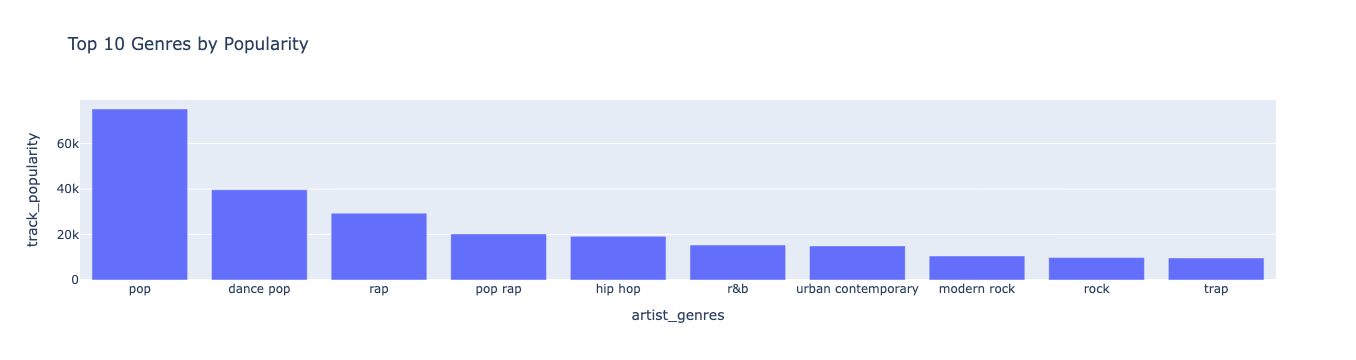

In [583]:
# Display Bar plot: Top 10 genres
fig = px.bar(top10_genres, x='artist_genres', y='track_popularity', title='Top 10 Genres by Popularity')

fig.write_image("top_genres.png")
fig.show()

In [585]:
top_genres

,artist_genres,track_popularity
325,pop,75215
117,dance pop,39677
355,rap,29414
333,pop rap,20266
208,hip hop,19200
...,...,...
235,italian adult pop,54
155,english indie rock,49
443,urbano chileno,13
256,mambo chileno,13


#### Genre Classification
* Determined the top genre classifications are pop, rap, hip-hop, rock and r&b
* If the genre does not line up with these five genres, it will be listed as Other
* The main_genre will be listed in a new column

In [588]:
# Insert new column using regex to extract the first genre in the 'artist_genres' column that matches the primary genres
# pop, rap, hip hop, rock, r&b

# Define regex pattern for genre extraction and simplification
genre_map = {
    r'pop': 'pop',
    r'rap': 'rap',
    r'rock': 'rock',
    r'r&b': 'r&b',
    r'hip hop': 'hip hop'
}

# Function to replace multiple genre names with simplified base genres identified in the Top 10
def simplify_genre(genre_list):
    if isinstance(genre_list, list):  
        for genre in genre_list:
            for pattern, replacement in genre_map.items():
                if re.search(pattern, genre, re.IGNORECASE):
                    return replacement  # Return the first matching simplified genre
    return "Other"  # If no match is found, return None

# Apply the function to extract simplified main genre
music_df['main_genre'] = music_df['artist_genres'].apply(simplify_genre)

music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,main_genre
0,2019,Cruel Summer,96,Lover,Taylor Swift,[pop],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97,pop
1,2023,Cruel Summer,96,Lover,Taylor Swift,[pop],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97,pop
2,2023,greedy,96,greedy,Tate McRae,[pop],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20,pop
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"[brooklyn indie, pov: indie]",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30,Other
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"[deep underground hip hop, kentucky hip hop, p...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31,hip hop


In [590]:
music_df.columns

Index(['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_min', 'main_genre'],
      dtype='object')

In [592]:
# Reorder columns to place 'main_genre' next to 'artist_genres'
music_df = music_df[['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'main_genre', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_min']] 
    
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,main_genre,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,2019,Cruel Summer,96,Lover,Taylor Swift,[pop],pop,100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
1,2023,Cruel Summer,96,Lover,Taylor Swift,[pop],pop,100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
2,2023,greedy,96,greedy,Tate McRae,[pop],pop,85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"[brooklyn indie, pov: indie]",Other,84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"[deep underground hip hop, kentucky hip hop, p...",hip hop,83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31


### Popular Music Analysis - Comparing Attributes using Plotly Express
* Using the attribute data to understand how they relate to the top genre categories of the popular songs

In [595]:
# Inspect Column Headers
music_df.columns

Index(['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'main_genre', 'artist_popularity', 'danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min'],
      dtype='object')

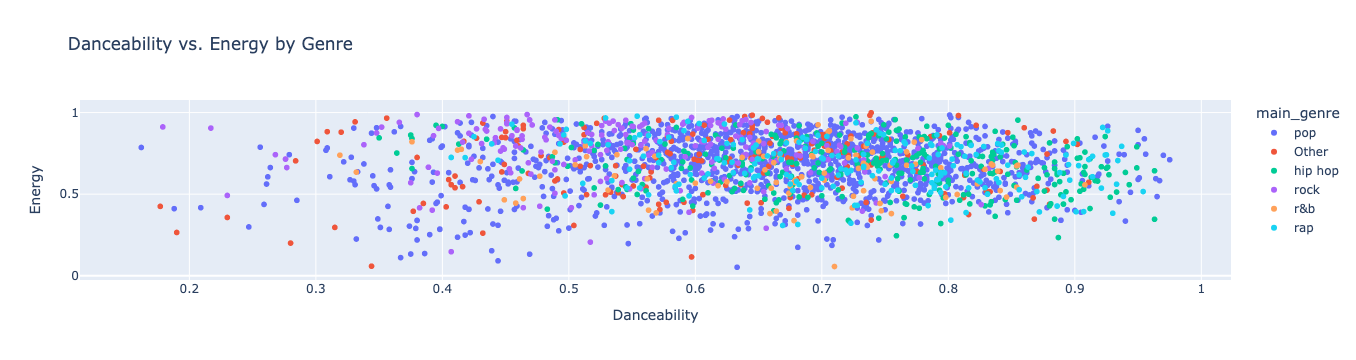

In [597]:
# Display Scatter Plot: Danceability vs. Energy

fig = px.scatter(
    music_df,
    x = 'danceability',
    y = 'energy',
    color = 'main_genre',
    hover_data = ['track_name', 'artist_name'],
    title = 'Danceability vs. Energy by Genre',
    labels = {'danceability': 'Danceability', 'energy': 'Energy'}
)

fig.write_image("popular_scatter.png")
fig.show()

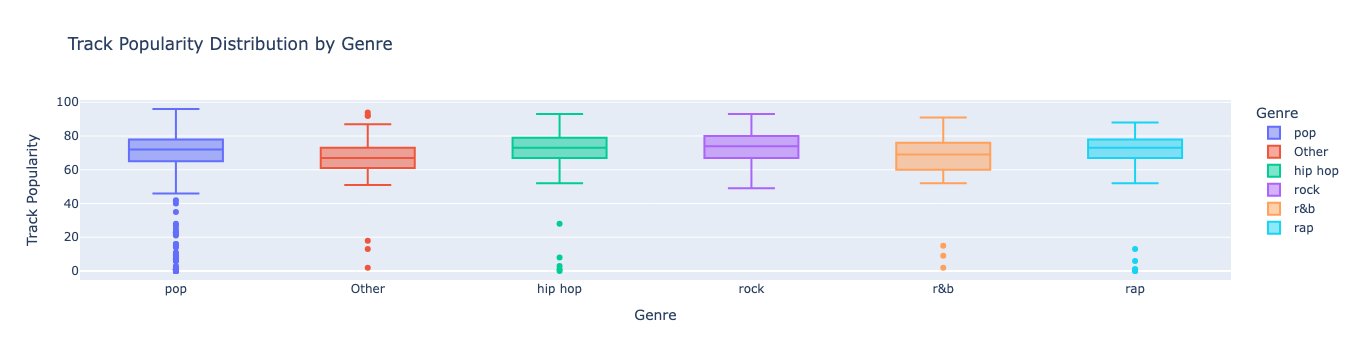

In [599]:
# Display Box Plot: Track Popularity by Genre

fig = px.box(
    music_df,
    x = 'main_genre',
    y = 'track_popularity',
    color = 'main_genre',
    title = 'Track Popularity Distribution by Genre',
    labels = {'main_genre': 'Genre', 'track_popularity': 'Track Popularity'}
)

fig.write_image("popular_boxplot.png")
fig.show()

#### Median Track Popularity
* Pop = 72
* Hip Hop = 73
* Rock = 74
* R&B = 69
* Rap = 73
* Other = 67
  
##### Future Analysis: Make comparison to scaled data and determine distribution

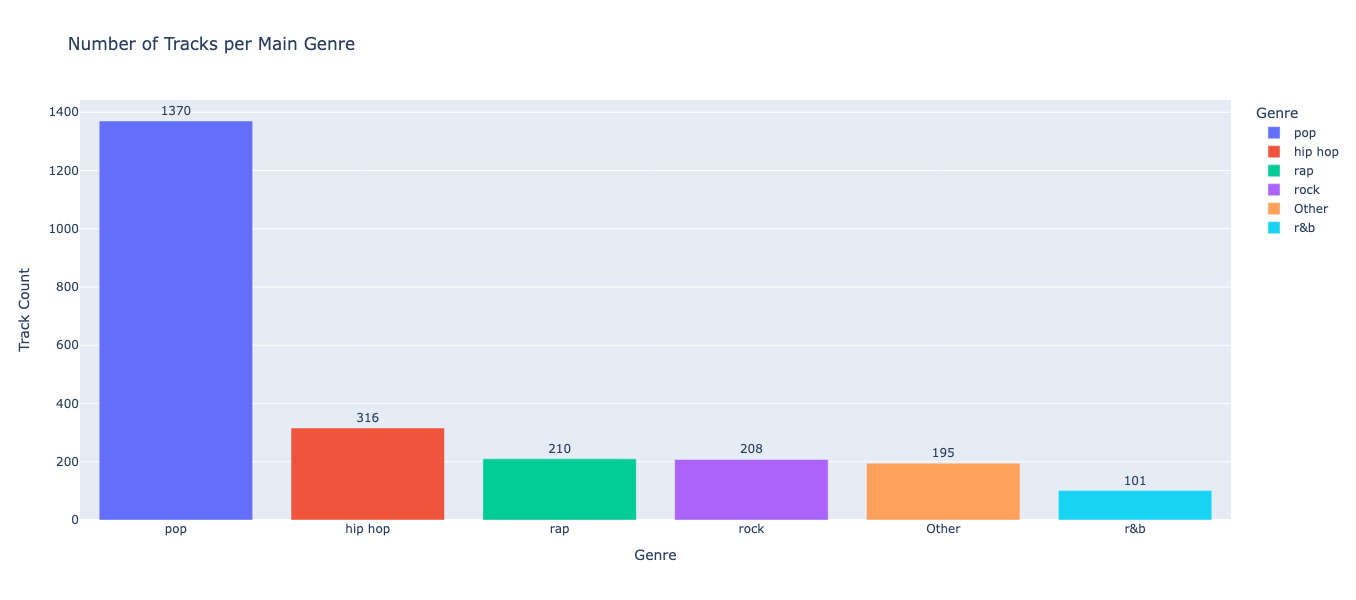

In [602]:
# Display Bar Chart: Count the number of tracks per main genre 

genre_counts = music_df['main_genre'].value_counts().reset_index()
genre_counts.columns = ['main_genre', 'count']

fig = px.bar(
    genre_counts,
    x = 'main_genre',
    y = 'count',
    text = 'count',
    title = 'Number of Tracks per Main Genre',
    color = 'main_genre',  
    labels = {'main_genre': 'Genre', 'count': 'Track Count'},
    width = 800,  
    height = 600 
)

fig.update_traces(textposition='outside')  # Show labels outside bars

fig.write_image("popoular_bar.png")
fig.show()

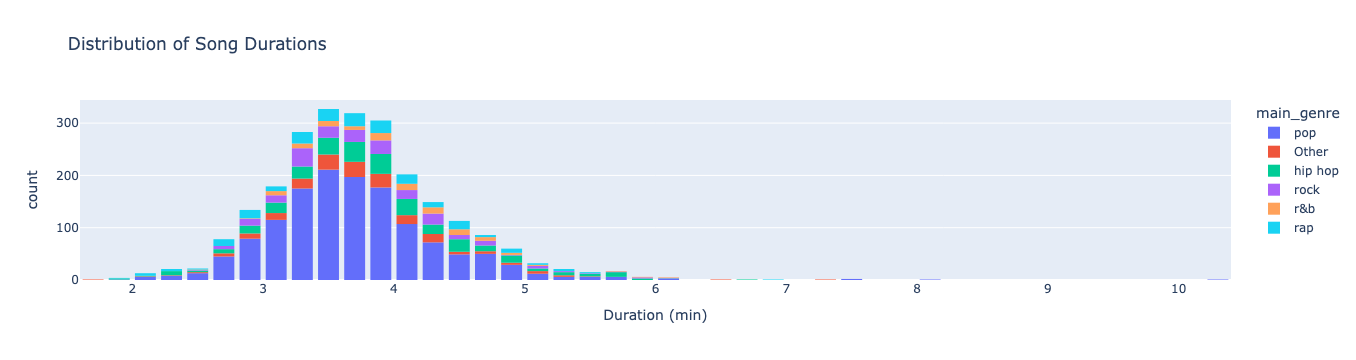

In [604]:
# Display Histogram: Distribution of Song Durations

fig = px.histogram(
    music_df,
    x = 'duration_min',
    nbins = 80,
    title = 'Distribution of Song Durations',
    labels = {'duration_min': 'Duration (min)'},
    color = 'main_genre'
)

fig.update_layout(bargap=0.2)  # Add spacing between bars for better separation

fig.write_image("popular_histogram.png")
fig.show()

### Unpopular Music Analysis - Comparing Attributes using Plotly Express
* Using the attribute data to understand how the overall sound of music 

In [607]:
unpopular_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_min', 'popularity', 'track_name', 'artist_name'],
      dtype='object')

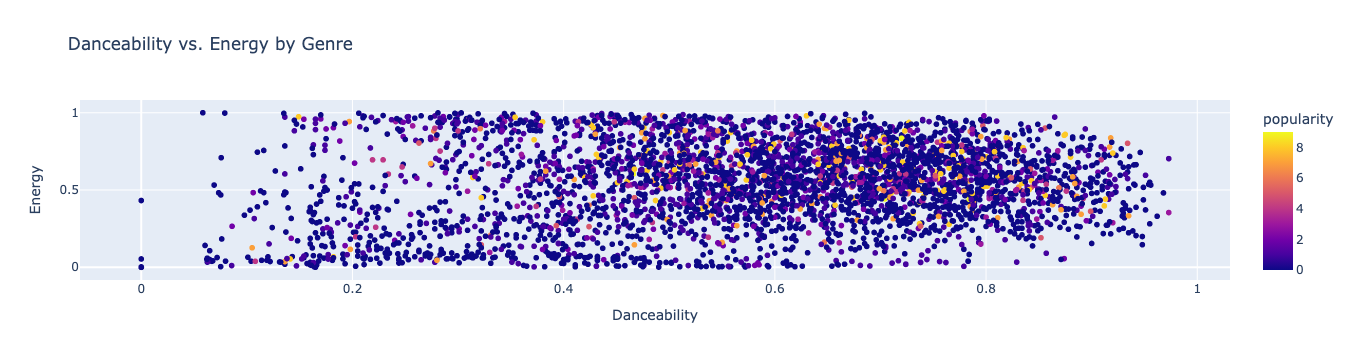

In [609]:
# Display Scatter Plot: Danceability vs. Energy

fig = px.scatter(
    unpopular_df,
    x = 'danceability',
    y = 'energy',
    color = 'popularity',
    hover_data = ['track_name', 'artist_name'],
    title = 'Danceability vs. Energy by Genre',
    labels = {'danceability': 'Danceability', 'energy': 'Energy'}
)

fig.write_image("unpopular_scatter.png")
fig.show()

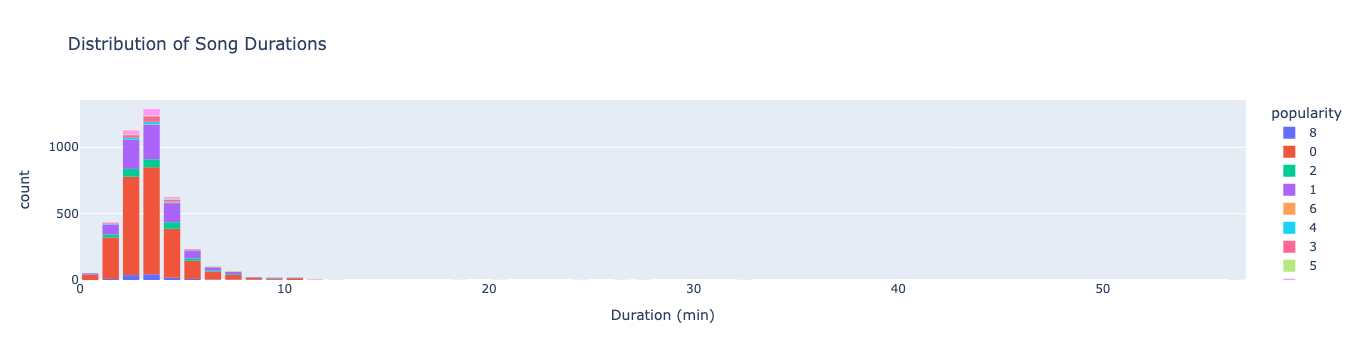

In [611]:
# Display Histogram: Distribution of Song Durations

fig = px.histogram(
    unpopular_df,
    x = 'duration_min',
    nbins = 80,
    title = 'Distribution of Song Durations',
    labels = {'duration_min': 'Duration (min)'},
    color = 'popularity'
)

fig.update_layout(bargap=0.2)  # Add spacing between bars for better separation

fig.write_image("unpopular_histogram.png")
fig.show()

In [613]:
# Final check 
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,main_genre,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,2019,Cruel Summer,96,Lover,Taylor Swift,[pop],pop,100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
1,2023,Cruel Summer,96,Lover,Taylor Swift,[pop],pop,100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
2,2023,greedy,96,greedy,Tate McRae,[pop],pop,85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"[brooklyn indie, pov: indie]",Other,84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"[deep underground hip hop, kentucky hip hop, p...",hip hop,83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31


In [615]:
# Create CSV File
music_df.to_csv('../Moody - Project 4/Resources/musicdf_file.csv', index=False, header=True)

# 1) Supervised Machine Learning - Logistic Regression with Scikit-Learn
* Predicting popularity by analyzing song attributes

#### Logistic Regression Modeling: Michelle 

In [730]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [732]:
# Load both datasets and make copy
popular_df = music_df.copy()
unpopular_df = unpopular_df.copy()

In [734]:
popular_df.columns

Index(['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'main_genre', 'artist_popularity', 'danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min'],
      dtype='object')

In [736]:
unpopular_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_min', 'track_popularity', 'track_name', 'artist_name',
       'popularity_label'],
      dtype='object')

In [738]:
# Ensure column names are consistent
unpopular_df.rename(columns={"popularity": "track_popularity"}, inplace=True)

In [740]:
# Assign target labels (1 = popular, 0 = unpopular)
popular_df["popularity_label"] = 1
unpopular_df["popularity_label"] = 0

In [742]:
# Select relevant columns (excluding text-based ones)
features = [
    'danceability', 'energy', 'key', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_min'
]

In [744]:
# Combine both datasets
combined_music_df = pd.concat([popular_df[features + ['popularity_label']], 
                unpopular_df[features + ['popularity_label']]], ignore_index=True)

combined_music_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,popularity_label
0,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97,1
1,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97,1
2,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20,1
3,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30,1
4,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31,1


In [746]:
combined_music_df.shape

(6401, 12)

In [748]:
# Handle missing values
combined_music_df.dropna(inplace=True)

In [750]:
# Normalize numerical features
scaler = StandardScaler()
combined_music_df[features] = scaler.fit_transform(combined_music_df[features])

In [752]:
# Separate Features(X) from the Target(y)
X = combined_music_df.drop(columns=['popularity_label'])
y = combined_music_df['popularity_label']

In [754]:
# Split data using test_train_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Print dataset sizes
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
print(f"Training Labels: {y_train.shape}, Testing Labels: {y_test.shape}")

Training Set: (4800, 11), Testing Set: (1601, 11)
Training Labels: (4800,), Testing Labels: (1601,)


In [756]:
# Count class distribution
train_class_distribution = np.bincount(y_train)
test_class_distribution = np.bincount(y_test)

print(f"Train Class Distribution: {train_class_distribution}")
print(f"Test Class Distribution: {test_class_distribution}")

Train Class Distribution: [3000 1800]
Test Class Distribution: [1001  600]


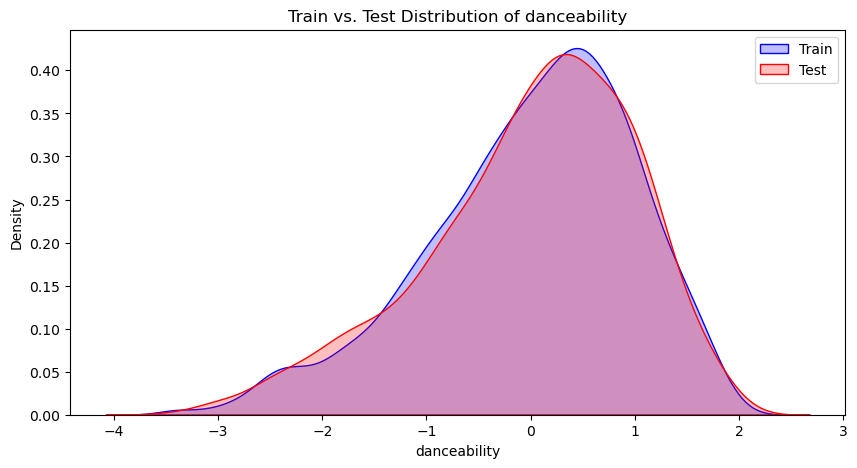

In [758]:
# Select a feature to compare 
feature = "danceability"

plt.figure(figsize=(10, 5))
sns.kdeplot(X_train[feature], label="Train", shade=True, color="blue")
sns.kdeplot(X_test[feature], label="Test", shade=True, color="red")
plt.xlabel(feature)
plt.title(f"Train vs. Test Distribution of {feature}")
plt.legend()
plt.show()

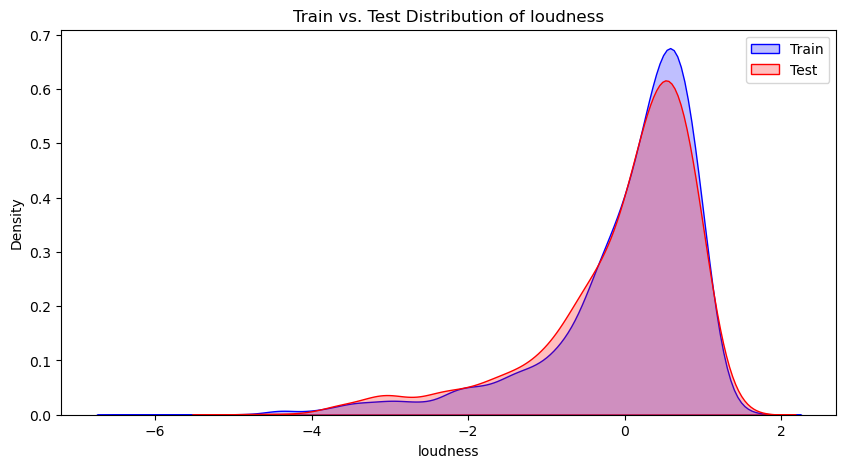

In [760]:
# Select a feature to compare 
feature = "loudness"

plt.figure(figsize=(10, 5))
sns.kdeplot(X_train[feature], label="Train", shade=True, color="blue")
sns.kdeplot(X_test[feature], label="Test", shade=True, color="red")
plt.xlabel(feature)
plt.title(f"Train vs. Test Distribution of {feature}")
plt.legend()
plt.show()

### Create Logistic Regression Model

In [846]:
model = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

### Model using the Training Data

In [849]:
# Train logistic regression model
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Score Model using the Test Data

In [852]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.77625
Testing Data Score: 0.7788881948782012


### Make Predictions

In [855]:
# Make predictions
predictions_log = model.predict(X_test)

### Calculate the Accuracy Score

In [858]:
# Evaluate model
accuracy_log = accuracy_score(y_test, predictions_log)
print(f"Model Accuracy: {accuracy_log:.2f}")
print(classification_report(y_test, predictions_log))

Model Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1001
           1       0.70      0.71      0.71       600

    accuracy                           0.78      1601
   macro avg       0.76      0.77      0.77      1601
weighted avg       0.78      0.78      0.78      1601



In [860]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,1,1
8,1,0
9,0,0


## Improving the Logistic Regression Model
* If the dataset has more popular songs than unpopular ones (or vice versa), logistic regression may be biased toward the majority class.
* To check for imbalance:

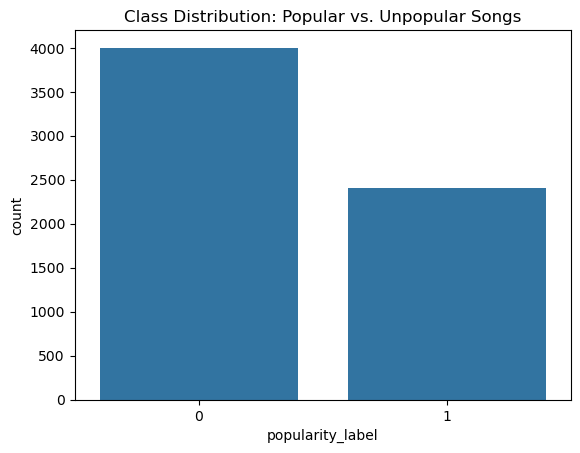

In [863]:
# Check class distribution
sns.countplot(x=combined_music_df['popularity_label'])
plt.title("Class Distribution: Popular vs. Unpopular Songs")
plt.show()

In [865]:
# Adjust class weights
model = LogisticRegression(class_weight='balanced', random_state=42, solver='lbfgs',
                                max_iter=200,)

In [867]:
# Train logistic regression model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=42)

In [963]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.76625
Testing Data Score: 0.7695190505933791


In [965]:
# Make predictions
predictions_log2 = model.predict(X_test)

In [967]:
# Evaluate model
accuracy_log2 = accuracy_score(y_test, predictions_log2)
print(f"Model Accuracy: {accuracy_log2:.2f}")
print(classification_report(y_test, predictions_log2))

Model Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1001
           1       0.65      0.83      0.73       600

    accuracy                           0.77      1601
   macro avg       0.76      0.78      0.76      1601
weighted avg       0.79      0.77      0.77      1601



In [969]:
results = pd.DataFrame({"Prediction": predictions_log2, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,1,1
8,1,0
9,0,0


## Assess Feature Importance
* Logistic regression assigns weights (coefficients) to each feature

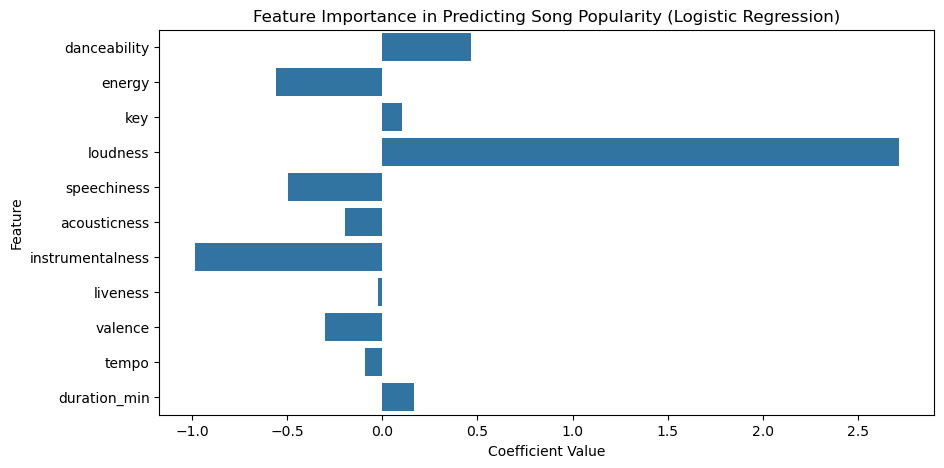

In [972]:
# Get feature importance
importance = model.coef_[0]
feature_names = X.columns

# Plot feature importance
plt.figure(figsize = (10, 5))
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance in Predicting Song Popularity (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

plt.savefig("feat_importance_log.png", bbox_inches="tight")
plt.show()

## Confusion Matrix
* High True Positives (TP) = Good at predicting popular songs.
* High False Positives (FP) = Too many unpopular songs misclassified as popular.
* High False Negatives (FN) = Missing actual popular songs.

- True Pos | False Pos
- False Neg | True Neg

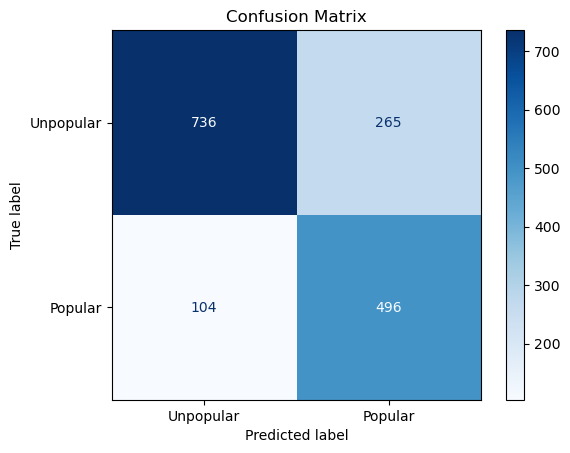

In [975]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Unpopular", "Popular"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 2) Supervised Machine Learning - Random Forest
* Useful for classification as it is more robust to feature interactions and handles missing data better than logistic regression

#### Random Forest Modeling: Michelle

In [979]:
# Import Dependencies
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [981]:
# Initialize Random Forest with default parameters
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

In [983]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [984]:
# Make predictions
predictions_rf = rf_model.predict(X_test)

In [987]:
# Evaluate performance
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, predictions_rf))

Random Forest Model Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1001
           1       0.77      0.76      0.76       600

    accuracy                           0.82      1601
   macro avg       0.81      0.81      0.81      1601
weighted avg       0.82      0.82      0.82      1601



## Assess Feature Importance

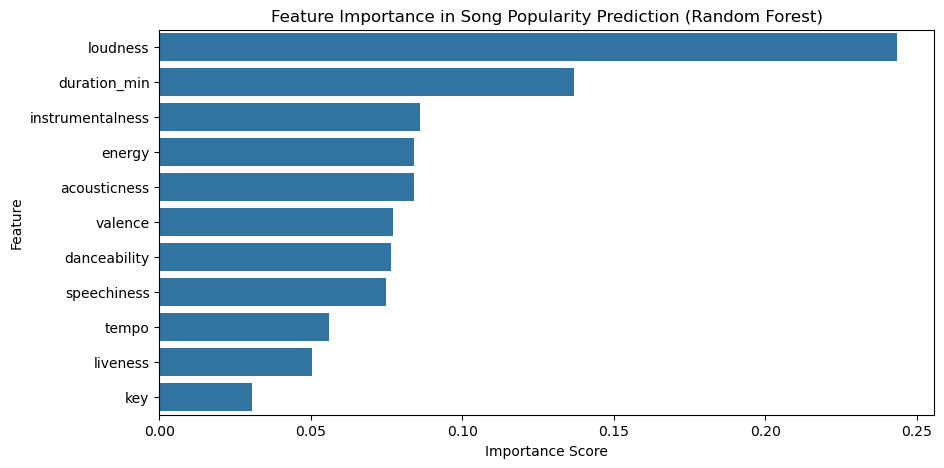

In [990]:
# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.title("Feature Importance in Song Popularity Prediction (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

plt.savefig("feat_importance_rf.png", bbox_inches="tight")
plt.show()

## Confusion Matrix

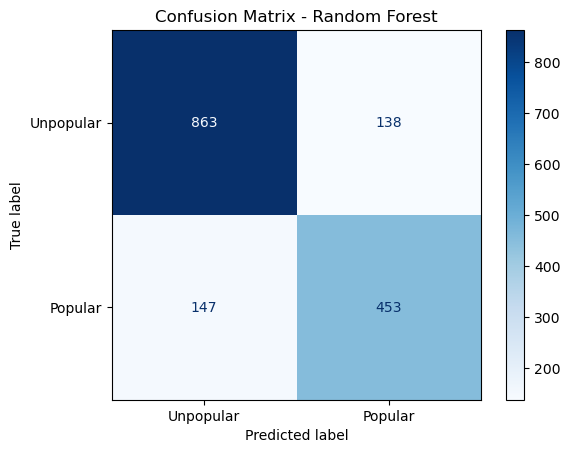

In [993]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Unpopular", "Popular"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 3) Supervised Machine Learning - Support Vector Machine (SVM) Modeling
* SVM is a powerful supervised learning algorithm that works well for binary classification and is particularly effective when the data is not perfectly separable

#### SVM Modeling: Michelle

In [997]:
# Import Dependencies
from sklearn.svm import SVC

In [999]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Initialize SVM model
* kernel = 'rbf': This specifies the kernel type to be used in the algorithm. The Radial Basis Function (RBF) kernel is a popular choice for non-linear classification problems. It transforms the input space into a higher-dimensional space to make it easier to separate classes.
* C = 1.0: This is the regularization parameter. It controls the trade-off between achieving a low training error and a low testing error, which helps prevent overfitting. A smaller value of C encourages a larger margin, while a larger value of C aims to classify all training points correctly.
* gamma = 'scale': This parameter defines how far the influence of a single training example reaches. The 'scale' option uses the formula ( \frac{1}{n_{\text{features}} \times \text{X.var()}} ) to determine the value of gamma, which can help in adjusting the decision boundary.
* probability = True: This enables probability estimates for the predictions. When set to True, the model will provide probabilities for each class when using the predict_proba method.
* class_weight = 'balanced': This parameter automatically adjusts the weights inversely proportional to class frequencies in the input data. This is useful for handling imbalanced datasets, ensuring that the model pays more attention to the minority class.

In [1002]:
# Initialize SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, class_weight='balanced', random_state=42)

In [1004]:
# Train the model
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [1005]:
# Make predictions
predictions_svm = svm_model.predict(X_test_scaled)

In [1006]:
# Compute accuracy
accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f"SVM Model Accuracy: {accuracy_svm:.2f}")

SVM Model Accuracy: 0.81


In [1007]:
# Display classification report
print("SVM Classification Report:")
print(classification_report(y_test, predictions_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1001
           1       0.70      0.87      0.77       600

    accuracy                           0.81      1601
   macro avg       0.80      0.82      0.80      1601
weighted avg       0.83      0.81      0.81      1601



## Assess Feature Importance 
* Permutation Importance randomly shuffles each feature and checks how much accuracy drops.
* This method works with non-linear kernels 

In [1013]:
# Import Dependencies
from sklearn.inspection import permutation_importance

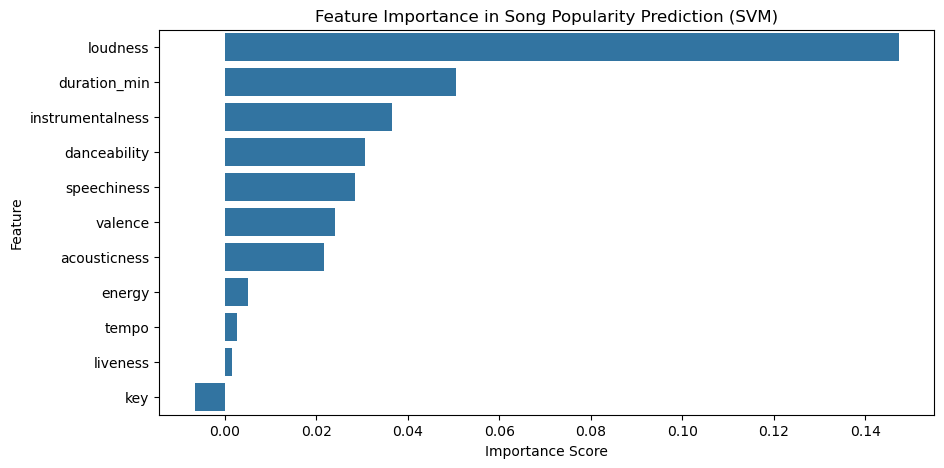

In [1015]:
# Compute permutation importance for SVM model
perm_importance = permutation_importance(svm_model, X_test_scaled, y_test, scoring="accuracy")

# Extract feature names and importance values
importances = perm_importance.importances_mean
feature_names = X.columns

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.title("Feature Importance in Song Popularity Prediction (SVM)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Save the plot
plt.savefig("feat_importance_svm.png", bbox_inches="tight")
plt.show()

## Confusion Matrix

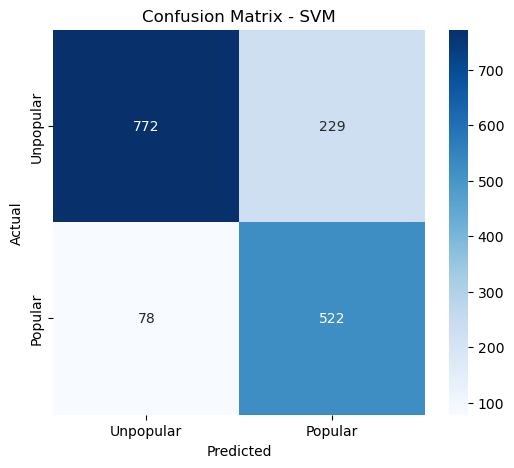

In [1017]:
# Compute confusion matrix
cm_svm = confusion_matrix(y_test, predictions_svm)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Unpopular", "Popular"], yticklabels=["Unpopular", "Popular"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

## Confusion Matrix Comparison
* Logistic Regression Model
* Random Forest Model
* SVM

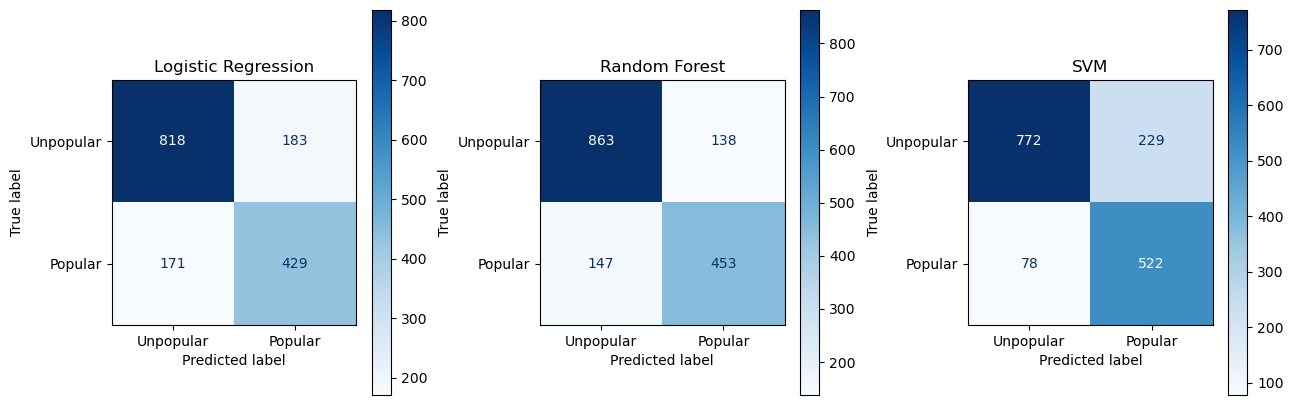

In [1019]:
# Confusion matrices
cm_log = confusion_matrix(y_test, predictions_log)
cm_rf = confusion_matrix(y_test, predictions_rf)
cm_svm = confusion_matrix(y_test, predictions_svm)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Unpopular", "Popular"])
disp1.plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression")

# Random Forest
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Unpopular", "Popular"])
disp2.plot(ax=axes[1], cmap="Blues")
axes[1].set_title("Random Forest")

# SVM
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Unpopular", "Popular"])
disp3.plot(ax=axes[2], cmap="Blues") 
axes[2].set_title("SVM")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)  

plt.savefig("cm_plots.png", bbox_inches="tight")
plt.show()

In [1023]:
# Store all model performances
model_performance = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [accuracy_log, accuracy_rf, accuracy_svm],
}

# Convert to DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by="Accuracy", ascending=False)

# Display results
print(performance_df)

                 Model  Accuracy
1        Random Forest  0.821986
2                  SVM  0.808245
0  Logistic Regression  0.778888


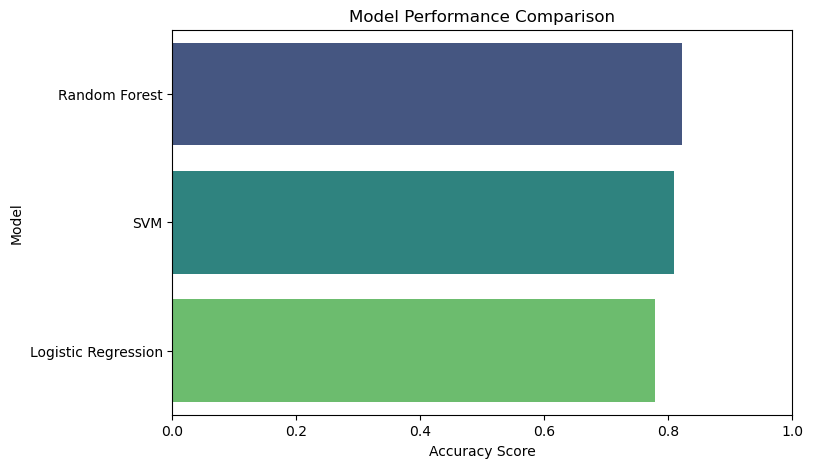

In [1025]:
# Barplot of Model Accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=performance_df, palette="viridis")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Performance Comparison")
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1

plt.savefig("model_performance.png", bbox_inches="tight")
plt.show()

# FURTHER EXPLORATIONS:
* Function for analyzing future datasets
* SVM optimization using GridSearchCV
* K-Means vs PCA
* Genre analysis - Determining cut off value
* Explore additional datasets with more features that would impact popoularity

# Function for Future Analysis:
* Train a supervised ML model to predict song popularity for future years
* Unable to get 2024 music data due to API deprecation as of November 27, 2024
* Parameters:
    - data (pd.DataFrame): Historical dataset with features and popularity scores
    - future_data (pd.DataFrame): Upcoming songs data for the next year
* Returns:
    pd.DataFrame: Future songs with predicted popularity scores
  


In [ ]:
def predict_popular_music(data, future_data):

    # Define features and target variable
    target = 'popularity'  # Adjust based on dataset
    features = [col for col in data.columns if col != target]

    # Separate X and y
    X = data[features]
    y = data[target]

    # Identify numerical and categorical features
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Preprocessing pipeline
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    # Model pipeline
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=500, random_state=42))
    ])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict future song popularity
    future_predictions = model.predict(future_data)

    # Return future data with predictions
    future_data['predicted_popularity'] = future_predictions
    return future_data

# Example:
# df = pd.read_csv('musicdf_file.csv')  # Load historical data
# future_songs = pd.read_csv('future_songs.csv')  
# predictions = predict_popular_music(df, future_songs)
# print(predictions)

# Future SVM Exploration:
* Attempted to run but timed out multiple times
* Code below is the method to fine tune SVM
* Determined that Random Forest was the most consistent model and paused this explorative analysis

## Hyperparameter Tuning for SVM using GridSearchCV
To improve the SVM model, assess key hyperparameters:
* C (Regularization Parameter): Controls the trade-off between achieving a low error and preventing overfitting.
* Gamma (Kernel Coefficient for RBF Kernel): Defines how far the influence of a single training sample reaches.
* Kernel: Test linear, rbf, and poly kernels to see which performs best.

In [497]:
# Import Dependencies
from sklearn.model_selection import GridSearchCV

In [499]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
    'kernel': ['linear', 'rbf', 'poly']  
}

In [ ]:
# Initialize SVM model
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)

# Grid Search with 5-Fold Cross Validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions
y_pred_best_svm = best_svm.predict(X_test_scaled)

# Evaluate Accuracy
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"Tuned SVM Accuracy: {accuracy_best_svm:.2f}")

# Classification Report
print("Tuned SVM Performance:")
print(classification_report(y_test, y_pred_best_svm))

# Deep Learning 

#### K-Means and Modeling: Michelle 

### Clustering Using K-Means - POPULAR SONGS

##### Import Dependencies and external libraries that will allow the code to function correctly
* sklearn.model_selection.train_test_split = library that splits a dataset into training and testing sets, essential for evaluating machine learning models 
* tensorflow = library used in deep learning framework used for building and training neural networks
* pathlib.Path = provides a way to work with file system paths
* ast = The Abstract Syntax Tree module, used to parse and analyze Python code as a tree structure—commonly used for safely evaluating Python expressions from strings

In [105]:
# Import our dependencies
import tensorflow as tf
from pathlib import Path
import hvplot.pandas

In [106]:
# Read the cleaned CSV file into a Pandas DataFrame
# Set the index using the track_name column
new_music_df = pd.read_csv(
    Path("../Moody - Project 4/Resources/musicdf_file.csv"),
    index_col = "track_name"
)

# Review the DataFrame
new_music_df

,year,track_popularity,album,artist_name,artist_genres,main_genre,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
track_name,,,,,,,,,,,,,,,,,,
Cruel Summer,2019,96,Lover,Taylor Swift,['pop'],pop,100,0.552,0.702,9,-5.707,0.1570,0.11700,0.000021,0.1050,0.564,169.994,2.97
Cruel Summer,2023,96,Lover,Taylor Swift,['pop'],pop,100,0.552,0.702,9,-5.707,0.1570,0.11700,0.000021,0.1050,0.564,169.994,2.97
greedy,2023,96,greedy,Tate McRae,['pop'],pop,85,0.750,0.733,6,-3.180,0.0319,0.25600,0.000000,0.1140,0.844,111.018,2.20
My Love Mine All Mine,2023,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",NaN,84,0.504,0.308,9,-14.958,0.0321,0.86800,0.135000,0.1580,0.121,113.950,2.30
Lovin On Me,2023,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",hip hop,83,0.943,0.558,2,-4.911,0.0568,0.00260,0.000002,0.0937,0.606,104.983,2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Butter,2021,0,Butter,BTS,"['k-pop', 'k-pop boy group', 'pop']",pop,87,0.759,0.459,8,-5.187,0.0948,0.00323,0.000000,0.0906,0.695,109.997,2.74
Solar Power,2021,0,Solar Power,Lorde,"['art pop', 'metropopolis', 'nz pop', 'pop']",pop,76,0.735,0.470,4,-9.405,0.1000,0.26600,0.000105,0.3200,0.897,87.971,3.21
Lost Cause,2021,0,Lost Cause,Billie Eilish,"['art pop', 'pop']",pop,89,0.671,0.336,10,-8.494,0.2410,0.70500,0.007510,0.0577,0.518,75.051,3.54


In [156]:
# Determine information on the dataset
new_music_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400 entries, Cruel Summer to Skate
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2400 non-null   int64  
 1   track_popularity   2400 non-null   int64  
 2   album              2400 non-null   object 
 3   artist_name        2400 non-null   object 
 4   artist_genres      2400 non-null   object 
 5   main_genre         2205 non-null   object 
 6   artist_popularity  2400 non-null   int64  
 7   danceability       2400 non-null   float64
 8   energy             2400 non-null   float64
 9   key                2400 non-null   int64  
 10  loudness           2400 non-null   float64
 11  speechiness        2400 non-null   float64
 12  acousticness       2400 non-null   float64
 13  instrumentalness   2400 non-null   float64
 14  liveness           2400 non-null   float64
 15  valence            2400 non-null   float64
 16  tempo            

In [158]:
# Select relevant numerical features 
scaled_features = ['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'valence', \
                   'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']


In [160]:
# Standardize the features for better clustering performance
scaler = StandardScaler()
music_scaled_values = scaler.fit_transform(new_music_df[scaled_features])

In [162]:
music_scaled_df = pd.DataFrame(music_scaled_values,
                               columns=['track_popularity','artist_popularity', 'danceability', 'energy', 'key', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'],
                               index=new_music_df.index)
music_scaled_df.head()

,track_popularity,artist_popularity,danceability,energy,key,valence,tempo,loudness,speechiness,acousticness,instrumentalness,liveness
track_name,,,,,,,,,,,,
Cruel Summer,1.985475,2.007409,-0.782346,0.080424,1.046023,0.122199,1.792605,0.050202,0.632719,-0.227168,-0.162988,-0.521741
Cruel Summer,1.985475,2.007409,-0.782346,0.080424,1.046023,0.122199,1.792605,0.050202,0.632719,-0.227168,-0.162988,-0.521741
greedy,1.985475,0.758891,0.628860,0.267950,0.211800,1.345189,-0.341543,1.261450,-0.708740,0.432895,-0.163238,-0.454639
My Love Mine All Mine,1.831101,0.675656,-1.124457,-2.302965,1.046023,-1.812745,-0.235444,-4.384012,-0.706596,3.339070,1.476168,-0.126586
Lovin On Me,1.753914,0.592422,2.004429,-0.790662,-0.900498,0.305648,-0.559930,0.431742,-0.441735,-0.770414,-0.163212,-0.605990


### Assessing Genres using get_dummies 
* Analysis below is a precusor to Unsupervised Learning analysis.
* Additional work must be performed to train and generate cutoff values for genre analysis.

In [164]:
# Convert string representation of lists to actual lists using ast.literal_eval
music_df['artist_genres'] = music_df['artist_genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode the genres into separate rows
df_exploded = music_df.explode('artist_genres')

# Encode the exploded genres to create genre categories
music_df_dummies = pd.get_dummies(df_exploded['artist_genres'])

# Convert the dummies to integer type and display the first few rows
music_df_dummies.astype(int)

,acoustic pop,adult standards,afro r&b,afrobeats,afrofuturism,alabama rap,album rock,alt z,alternative dance,alternative hip hop,...,viral rap,viral trap,virgin islands reggae,virginia hip hop,vocal house,vocal jazz,washington indie,welsh rock,west coast rap,wrestling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Initialize the K-Means model 
* Use the elbow method to find the best value for k using the PCA data - Using range from 1 to 11

In [166]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3, random_state=0)

In [168]:
model.fit(music_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [170]:
# Predict the model segments (clusters)
k_3 = model.predict(music_scaled_df)

# View the stock segments
print(k_3)

[0 0 1 ... 2 2 1]


In [172]:
# Create a copy of the DataFrame
music_scaled_predictions_df = music_scaled_df.copy()

# Create a new column in the DataFrame with the predicted clusters
music_scaled_predictions_df["cluster"] = k_3

# Review the DataFrame
music_scaled_predictions_df.head()

,track_popularity,artist_popularity,danceability,energy,key,valence,tempo,loudness,speechiness,acousticness,instrumentalness,liveness,cluster
track_name,,,,,,,,,,,,,
Cruel Summer,1.985475,2.007409,-0.782346,0.080424,1.046023,0.122199,1.792605,0.050202,0.632719,-0.227168,-0.162988,-0.521741,0
Cruel Summer,1.985475,2.007409,-0.782346,0.080424,1.046023,0.122199,1.792605,0.050202,0.632719,-0.227168,-0.162988,-0.521741,0
greedy,1.985475,0.758891,0.628860,0.267950,0.211800,1.345189,-0.341543,1.261450,-0.708740,0.432895,-0.163238,-0.454639,1
My Love Mine All Mine,1.831101,0.675656,-1.124457,-2.302965,1.046023,-1.812745,-0.235444,-4.384012,-0.706596,3.339070,1.476168,-0.126586,2
Lovin On Me,1.753914,0.592422,2.004429,-0.790662,-0.900498,0.305648,-0.559930,0.431742,-0.441735,-0.770414,-0.163212,-0.605990,1


In [961]:
# Create a scatter plot with x="AnnualVariance:,  y="AnnualReturn"
music_scaled_predictions_df.hvplot.scatter(
    x="artist_popularity",
    y="track_popularity",
    by="cluster",
    hover_cols = ["track_name"]
)


:NdOverlay   [cluster]
   :Scatter   [artist_popularity]   (track_popularity,track_name)

### Reduce the number of features to two principal compondents and calculate the variance

In [176]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=2)

In [178]:
# Fit the music_scaled_predictions_df to the PCA
music_pca_data = pca.fit_transform(music_scaled_predictions_df)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
music_pca_data[:5]

array([[-0.23766202,  1.40127015],
       [-0.23766202,  1.40127015],
       [-0.66315952, -0.76374433],
       [ 6.26045076,  1.09374951],
       [ 0.0398943 , -1.39620152]])

In [180]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.21039868, 0.12468052])

In [182]:
new_music_df.head()

,year,track_popularity,album,artist_name,artist_genres,main_genre,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
track_name,,,,,,,,,,,,,,,,,,
Cruel Summer,2019,96,Lover,Taylor Swift,['pop'],pop,100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
Cruel Summer,2023,96,Lover,Taylor Swift,['pop'],pop,100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
greedy,2023,96,greedy,Tate McRae,['pop'],pop,85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
My Love Mine All Mine,2023,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",NaN,84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
Lovin On Me,2023,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",hip hop,83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31


In [184]:
# Creating a DataFrame with the PCA data
df_music_pca = pd.DataFrame(music_pca_data, columns=["PC1", "PC2"])

# Copy the tickers names from the original data
df_music_pca["track_name"] = new_music_df.index
# Set the Ticker column as index
df_music_pca = df_music_pca.set_index("track_name")

# Review the DataFrame
df_music_pca.head()

,PC1,PC2
track_name,,
Cruel Summer,-0.237662,1.401270
Cruel Summer,-0.237662,1.401270
greedy,-0.663160,-0.763744
My Love Mine All Mine,6.260451,1.093750
Lovin On Me,0.039894,-1.396202


In [186]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3)

# Fit the model for the df_stocks_pca DataFrame
model.fit(df_music_pca)

# Predict the model segments (clusters)
music_clusters = model.predict(df_music_pca)

# Print the music segments
print(music_clusters)

[2 2 0 ... 1 1 0]


In [188]:
# Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
music_pca_predictions = df_music_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
music_pca_predictions["cluster"] = music_clusters

# Review the DataFrame
music_pca_predictions.head()

,PC1,PC2,cluster
track_name,,,
Cruel Summer,-0.237662,1.401270,2
Cruel Summer,-0.237662,1.401270,2
greedy,-0.663160,-0.763744,0
My Love Mine All Mine,6.260451,1.093750,1
Lovin On Me,0.039894,-1.396202,0


In [1029]:
# Create the scatter plot with x="PC1" and y="PC2"
music_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    title = "Scatter Plot by Music Segment - PCA=2"
)


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2)

### PCA Benefits
* Using less features allows for reduced dimensionality in datasets while preserving as much variance as possible
* Helps avoid the curse of dimensionality, improving model efficiency
* Lower-dimensional data means faster training for machine learning models
* Removes less significant components (low-variance features), denoising the dataset
* Improves model generalization by reducing overfitting

## Elbow Method - Scaled Data

In [197]:
# Find optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)

for i in k_values:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(music_scaled_df)
    inertia.append(model.inertia_)

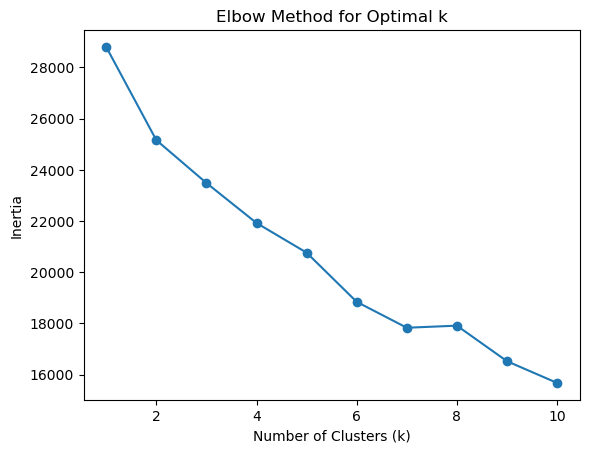

In [199]:
# Plot Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

## Elbow Method - PCA Data

In [201]:
df_music_pca.head()

,PC1,PC2
track_name,,
Cruel Summer,-0.237662,1.401270
Cruel Summer,-0.237662,1.401270
greedy,-0.663160,-0.763744
My Love Mine All Mine,6.260451,1.093750
Lovin On Me,0.039894,-1.396202


In [203]:
# Find optimal number of clusters using Elbow Method
inertia = []
k = range(1, 11)

for i in k:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(df_music_pca)
    inertia.append(model.inertia_)

In [205]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [207]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data")
elbow_plot_pca


:Curve   [k]   (inertia)